In [1]:
# Importing libraries  
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 


In [2]:
# Load datasets
training_data_path = 'C:/Users/User/Downloads/P2/ticdata2000.txt'
test_data_path = 'C:/Users/User/Downloads/P2/ticeval2000.txt'
train_data = pd.read_csv(training_data_path, header=None, sep='\t')
test_data = pd.read_csv(test_data_path, header=None, sep='\t')


In [3]:
# Preview train dataset
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0


In [4]:
# Preview train dataset
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
0,33,1,4,2,8,0,6,0,3,5,...,0,0,0,0,1,0,0,0,0,0
1,6,1,3,2,2,0,5,0,4,5,...,2,0,0,0,1,0,0,0,0,0
2,39,1,3,3,9,1,4,2,3,5,...,1,0,0,0,1,0,0,0,0,0
3,9,1,2,3,3,2,3,2,4,5,...,0,0,0,0,1,0,0,0,0,0
4,31,1,2,4,7,0,2,0,7,9,...,0,0,0,0,1,0,0,0,0,0


In [5]:
# Basic train statistics
print(train_data.describe())

                0            1            2            3            4   \
count  5822.000000  5822.000000  5822.000000  5822.000000  5822.000000   
mean     24.253349     1.110615     2.678805     2.991240     5.773617   
std      12.846706     0.405842     0.789835     0.814589     2.856760   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%      10.000000     1.000000     2.000000     2.000000     3.000000   
50%      30.000000     1.000000     3.000000     3.000000     7.000000   
75%      35.000000     1.000000     3.000000     3.000000     8.000000   
max      41.000000    10.000000     5.000000     6.000000    10.000000   

                5            6            7            8            9   ...  \
count  5822.000000  5822.000000  5822.000000  5822.000000  5822.000000  ...   
mean      0.696496     4.626932     1.069907     3.258502     6.183442  ...   
std       1.003234     1.715843     1.017503     1.597647     1.909482  ...   
min       0.00000

In [6]:
# Check size and shape of datasets
train_data.shape, test_data.shape

((5822, 86), (4000, 85))

In [7]:
# Train to test sets ratio
(test_data.shape[0]) / (train_data.shape[0] + test_data.shape[0])

0.4072490327835471

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 86 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       5822 non-null   int64
 1   1       5822 non-null   int64
 2   2       5822 non-null   int64
 3   3       5822 non-null   int64
 4   4       5822 non-null   int64
 5   5       5822 non-null   int64
 6   6       5822 non-null   int64
 7   7       5822 non-null   int64
 8   8       5822 non-null   int64
 9   9       5822 non-null   int64
 10  10      5822 non-null   int64
 11  11      5822 non-null   int64
 12  12      5822 non-null   int64
 13  13      5822 non-null   int64
 14  14      5822 non-null   int64
 15  15      5822 non-null   int64
 16  16      5822 non-null   int64
 17  17      5822 non-null   int64
 18  18      5822 non-null   int64
 19  19      5822 non-null   int64
 20  20      5822 non-null   int64
 21  21      5822 non-null   int64
 22  22      5822 non-null   int64
 23  23      5822 

In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 85 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       4000 non-null   int64
 1   1       4000 non-null   int64
 2   2       4000 non-null   int64
 3   3       4000 non-null   int64
 4   4       4000 non-null   int64
 5   5       4000 non-null   int64
 6   6       4000 non-null   int64
 7   7       4000 non-null   int64
 8   8       4000 non-null   int64
 9   9       4000 non-null   int64
 10  10      4000 non-null   int64
 11  11      4000 non-null   int64
 12  12      4000 non-null   int64
 13  13      4000 non-null   int64
 14  14      4000 non-null   int64
 15  15      4000 non-null   int64
 16  16      4000 non-null   int64
 17  17      4000 non-null   int64
 18  18      4000 non-null   int64
 19  19      4000 non-null   int64
 20  20      4000 non-null   int64
 21  21      4000 non-null   int64
 22  22      4000 non-null   int64
 23  23      4000 

In [10]:
# Assuming 'train_data' is already loaded as a DataFrame
y_train = train_data.iloc[:, 85]  # Column 84 as the target variable

# Check the distribution of the target variable
target_distribution = y_train.value_counts(normalize=True)
print("Train_data Target Distribution:\n", target_distribution)


Train_data Target Distribution:
 0    0.940227
1    0.059773
Name: 85, dtype: float64


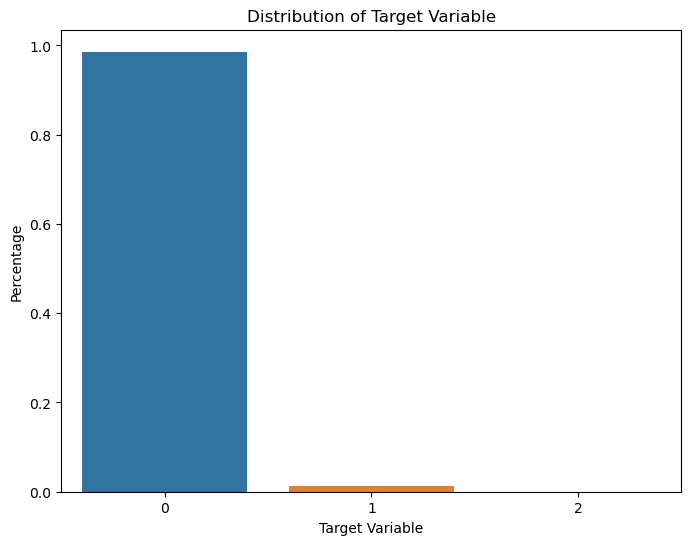

In [11]:
# Plot the target distribution on train dataset
y_train = train_data.iloc[:, 84]  # Column 84 as the target variable

# Check the distribution of the target variable
target_distribution = y_train.value_counts(normalize=True)


plt.figure(figsize=(8, 6))
sns.barplot(x=target_distribution.index, y=target_distribution.values)
plt.title("Distribution of Target Variable")
plt.xlabel("Target Variable")
plt.ylabel("Percentage")
plt.show()


In [12]:
# Assuming `train_data` is your DataFrame
X = train_data.iloc[:, :-1]  # All rows, all columns except the last
y = train_data.iloc[:, -1]  # All rows, only the last column

# First, split into training (60%) and temp (40%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Then, split temp into validation (50% of temp, 20% of total) and test sets (50% of temp, 20% of total)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Output the sizes of each split to verify
print("Training set size:", X_train.shape)
print("Validation set size:", X_val.shape)
print("Test set size:", X_test.shape)


Training set size: (3493, 85)
Validation set size: (1164, 85)
Test set size: (1165, 85)


In [13]:
# Scale the features for preprocessing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [14]:
# Train RandomForest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Evaluate on the test set
y_pred_rf = rf.predict(X_test_scaled)
print("RandomForest Test Set Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


RandomForest Test Set Evaluation:
Accuracy: 0.9296137339055794
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1089
           1       0.31      0.07      0.11        76

    accuracy                           0.93      1165
   macro avg       0.63      0.53      0.54      1165
weighted avg       0.90      0.93      0.91      1165



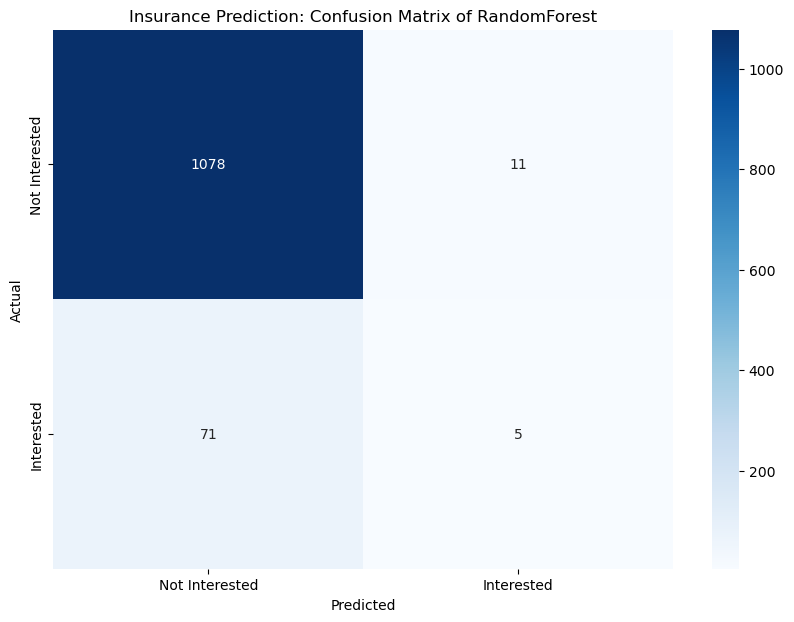

In [15]:
# Generate the confusion matrix for RandomForest
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Interested', 'Interested'], yticklabels=['Not Interested', 'Interested'])
plt.title('Insurance Prediction: Confusion Matrix of RandomForest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [16]:
# Define and compile the Neural Network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, validation_data=(X_val_scaled, y_val))

# Evaluate on the test set
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Neural Network Test Set Evaluation:\nAccuracy: {accuracy}\n")


Epoch 1/10
110/110 [==============================] - 1s 3ms/step - loss: 0.2316 - accuracy: 0.9439 - val_loss: 0.2352 - val_accuracy: 0.9330
Epoch 2/10
110/110 [==============================] - 0s 2ms/step - loss: 0.1929 - accuracy: 0.9445 - val_loss: 0.2339 - val_accuracy: 0.9330
Epoch 3/10
110/110 [==============================] - 0s 2ms/step - loss: 0.1786 - accuracy: 0.9447 - val_loss: 0.2291 - val_accuracy: 0.9330
Epoch 4/10
110/110 [==============================] - 0s 2ms/step - loss: 0.1704 - accuracy: 0.9459 - val_loss: 0.2348 - val_accuracy: 0.9330
Epoch 5/10
110/110 [==============================] - 0s 2ms/step - loss: 0.1626 - accuracy: 0.9450 - val_loss: 0.2327 - val_accuracy: 0.9330
Epoch 6/10
110/110 [==============================] - 0s 2ms/step - loss: 0.1564 - accuracy: 0.9459 - val_loss: 0.2397 - val_accuracy: 0.9321
Epoch 7/10
110/110 [==============================] - 0s 2ms/step - loss: 0.1500 - accuracy: 0.9482 - val_loss: 0.2359 - val_accuracy: 0.9321
Epoch 

37/37 [==============================] - 0s 2ms/step


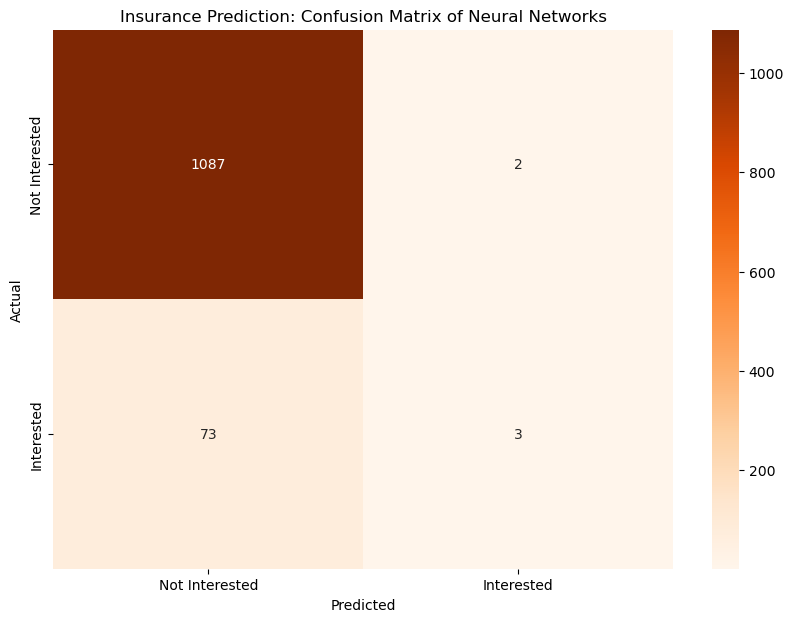

In [17]:
# Predict on the test set - gives you probabilities
y_pred_prob = model.predict(X_test_scaled)

# Convert probabilities to binary predictions
y_pred_nn_binary = (y_pred_prob > 0.5).astype(int).flatten()

# Generate the confusion matrix
cm_nn = confusion_matrix(y_test, y_pred_nn_binary)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_nn, annot=True, fmt="d", cmap='Oranges', xticklabels=['Not Interested', 'Interested'], yticklabels=['Not Interested', 'Interested'])
plt.title('Insurance Prediction: Confusion Matrix of Neural Networks')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
